In [8]:
#importing all the necessary modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_csv("desktop/py_files/data/health_insurance.csv")#importing our data

In [10]:
df.head()#checking the first 5 values

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.shape#checking the total rows and columns in our dataset

(1338, 7)

In [12]:
df.isnull().sum()#checking is there any null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.info()#checking data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
#label encoding to convert the objects to float values
#sex
le=LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex=le.transform(df.sex)
#smoker
le=LabelEncoder()
le.fit(df.smoker.drop_duplicates())
df.smoker=le.transform(df.smoker)
#region
le=LabelEncoder()
le.fit(df.region.drop_duplicates())
df.region=le.transform(df.region)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [24]:
#### Visualizing our data

<AxesSubplot:>

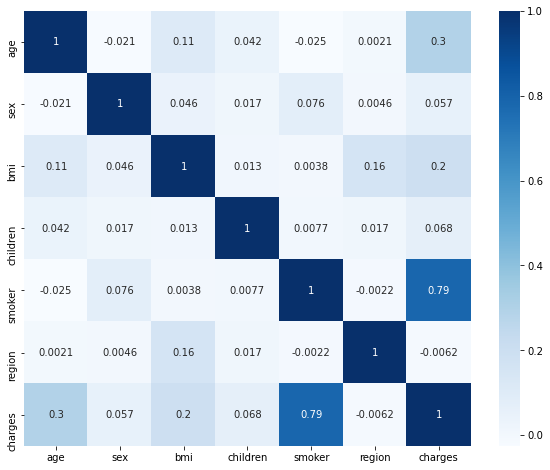

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")


In [23]:
#from the above heatmap we can see that there is a strong correlation between smoker & charges.

In [35]:
#### applying ML models

In [36]:
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))


0.7962732059725786


In [37]:
# model score on our testing data while applying simple linear reg

In [41]:
#ridge reg
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

rg=Ridge()
params={"alpha":[0.001,0.002,1,10,20,20,40,50,100]}
rreg=GridSearchCV(rg,params,cv=5)
rreg.fit(x_train,y_train)

y_train_pred = rreg.predict(x_train)
y_test_pred = rreg.predict(x_test)

print(rreg.score(x_test,y_test))

0.7959802316677902


In [42]:
#lasso reg
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

ls=Lasso()
params={"alpha":[0.001,0.002,1,10,20,20,40,50,100]}
lreg=GridSearchCV(ls,params,cv=5)
lreg.fit(x_train,y_train)

y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)

print(lreg.score(x_test,y_test))

0.7956695364361012
